<a href="https://colab.research.google.com/github/jamalromero/colab/blob/main/3_2_Shallow_Networks_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Understanding Deep Learning** [book](https://udlbook.github.io/udlbook/)
## **Notebook 3.2 -- Shallow neural networks II**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Keep Python runtime and install java

In [ ]:
!apt install openjdk-17-jdk

Install Juyter Java kernel

In [ ]:
!pip install jbang
import jbang
jbang.exec("trust add https://github.com/jupyter-java")
jbang.exec("install-kernel@jupyter-java")

Change Runtime to Java kernel and test Java runtime.

In [ ]:
System.getProperty("java.version")

Load external script to include maven dependency, import packages and intial startup script. Example:

```
%%loadFromPOM
<dependency>
    <groupId>tech.tablesaw</groupId>
    <artifactId>tablesaw-core</artifactId>
    <version>0.43.1</version>
</dependency>

import java.util.stream.*;

System.getProperty("java.version");

```



In [ ]:
%load /content/drive/MyDrive/colab/init_script.ipynb

In [ ]:
NDManager manager = NDManager.newBaseManager();

In [9]:
double theta_10 =  -4 ;  double theta_11 = 0.9; double theta_12 = 0;
double theta_20 =  5  ; double theta_21 = -0.9 ; double theta_22 = -0.5;
double theta_30 =  -7  ; double theta_31 = 0.5; double theta_32 = 0.9;
double phi_0 = 0; double phi_1 = -2; double phi_2 = 2; double phi_3 = 1.5;

In [11]:
NDArray linearFunction(NDArray x1, NDArray x2,
                       double theta_10,  double theta_11, double theta_12,
                       double theta_20, double theta_21, double theta_22,
                       double theta_30, double theta_31, double theta_32,
                       double phi_0, double phi_1, double phi_2, double phi_3,
                       boolean withActivation) {

  var h1 = x1.mul(theta_11).add(x2.mul(theta_12)).add(theta_10);
  var h2 = x1.mul(theta_21).add(x2.mul(theta_22)).add(theta_20);
  var h3 = x1.mul(theta_31).add(x2.mul(theta_32)).add(theta_30);
  if(withActivation) {
    h1 = Activation.relu(h1);
    h2 = Activation.relu(h2);
    h3 = Activation.relu(h3);
  }
  return h1.mul(phi_1).add(h2.mul(phi_2)).add(h3.mul(phi_3)).add(phi_0);
}

In [13]:
Canvas plotMap(NDArray x1, NDArray x2, NDArray y, boolean isHeatmap, boolean withContour) {
    if(isHeatmap) {
        var canvas = Heatmap.of(x1.toDoubleArray(), x2.toDoubleArray(), toDoubleArray(y), 256).canvas();
        if(withContour) {
          canvas.add(Contour.of(x1.toDoubleArray(), x2.toDoubleArray(), toDoubleArray(y), 256));
        }
        canvas.setAxisLabels("x1", "x2");
        return canvas;
    } else {
        var canvas = Surface.of(x1.toDoubleArray(), x2.toDoubleArray(), toDoubleArray(y), Palette.jet(256, 1.0f)).canvas();
        canvas.setAxisLabels("x2", "x1");
        return canvas;
    }
}

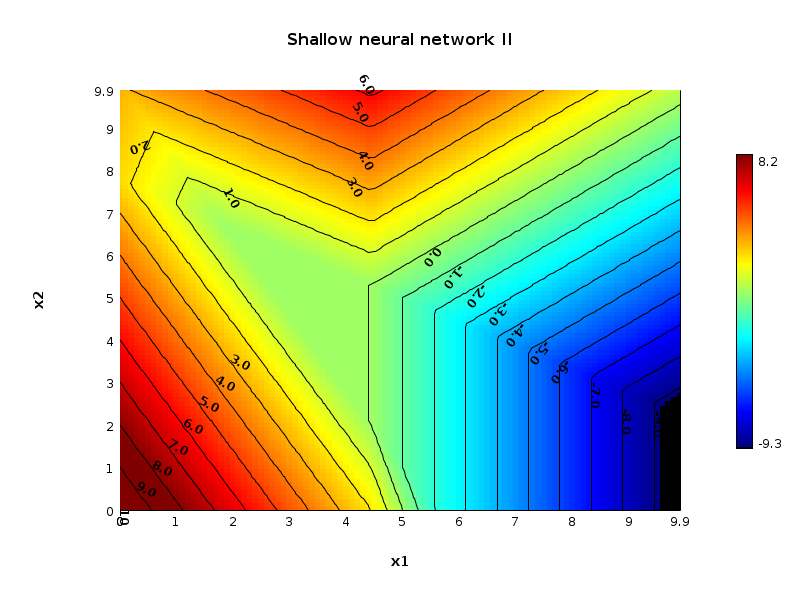

In [16]:
var x1 = manager.arange(0f, 10f, 0.1f, DataType.FLOAT64);
var x2 = manager.arange(0f, 10f, 0.1f, DataType.FLOAT64);

var gridMap = meshgrid(x1, x2);

var y = linearFunction(gridMap.get("x1"), gridMap.get("x2"),
                       theta_10,  theta_11, theta_12,
                       theta_20, theta_21, theta_22,
                       theta_30, theta_31, theta_32,
                       phi_0, phi_1, phi_2, phi_3,
                       true);

var canvas = plotMap(x1, x2, y, true, true);
canvas.setTitle("Shallow neural network II");
canvas.toBufferedImage(800, 600);


How many different linear polytopes are made by this model?  Identify each in the network output.

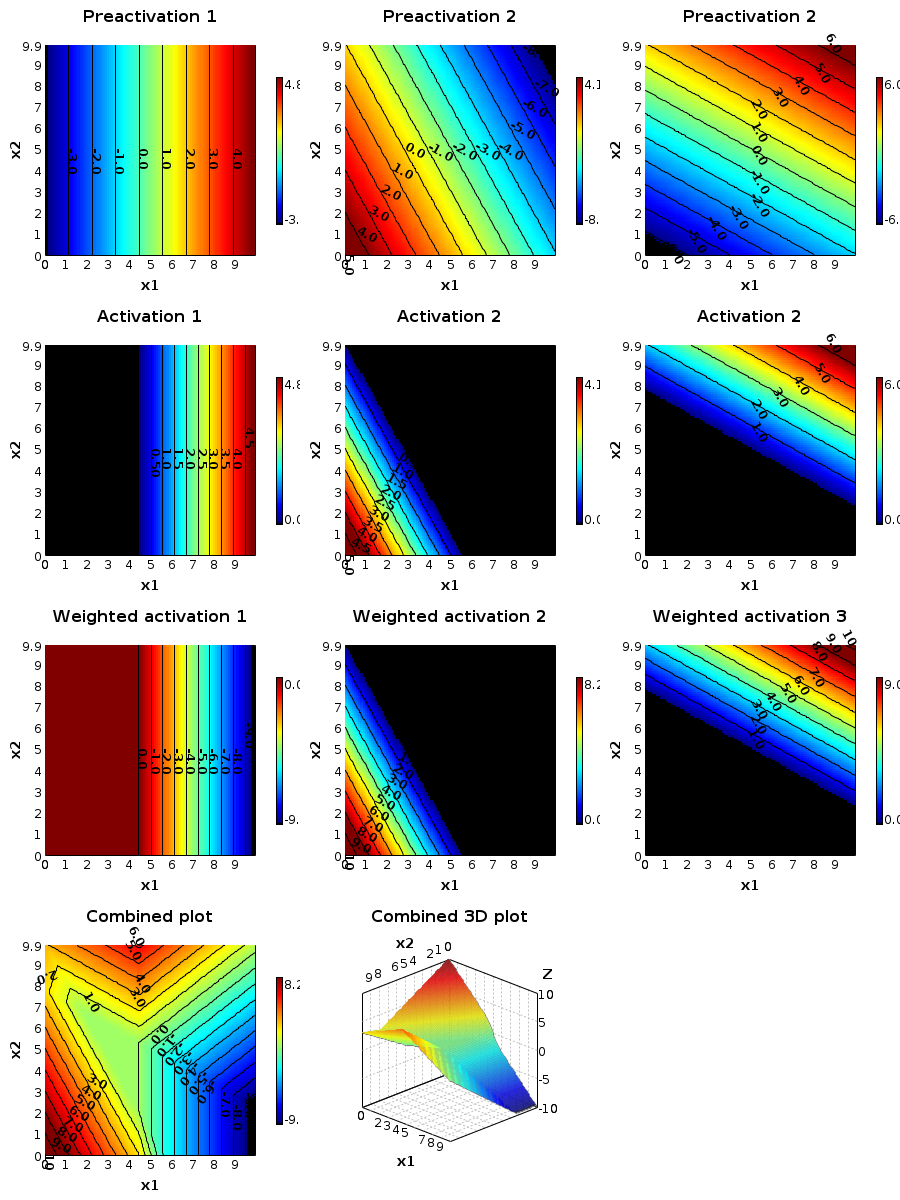

In [76]:
var y = linearFunction(gridMap.get("x1"), gridMap.get("x2"),
                       theta_10,  theta_11, theta_12,
                       theta_20, theta_21, theta_22,
                       theta_30, theta_31, theta_32,
                       0, 1, 0, 0,
                       false);

var preactivation1 = plotMap(x1, x2, y, true, true);
preactivation1.setTitle("Preactivation 1");

y = linearFunction(gridMap.get("x1"), gridMap.get("x2"),
                       theta_10,  theta_11, theta_12,
                       theta_20, theta_21, theta_22,
                       theta_30, theta_31, theta_32,
                       0, 0, 1, 0,
                       false);

var preactivation2 = plotMap(x1, x2, y, true, true);
preactivation2.setTitle("Preactivation 2");

y = linearFunction(gridMap.get("x1"), gridMap.get("x2"),
                       theta_10,  theta_11, theta_12,
                       theta_20, theta_21, theta_22,
                       theta_30, theta_31, theta_32,
                       0, 0, 0, 1,
                       false);

var preactivation3 = plotMap(x1, x2, y, true, true);
preactivation3.setTitle("Preactivation 2");

y = linearFunction(gridMap.get("x1"), gridMap.get("x2"),
                       theta_10,  theta_11, theta_12,
                       theta_20, theta_21, theta_22,
                       theta_30, theta_31, theta_32,
                       0, 1, 0, 0,
                       true);

var activation1 = plotMap(x1, x2, y, true, true);
activation1.setTitle("Activation 1");

y = linearFunction(gridMap.get("x1"), gridMap.get("x2"),
                       theta_10,  theta_11, theta_12,
                       theta_20, theta_21, theta_22,
                       theta_30, theta_31, theta_32,
                       0, 0, 1, 0,
                       true);

var activation2 = plotMap(x1, x2, y, true, true);
activation2.setTitle("Activation 2");

y = linearFunction(gridMap.get("x1"), gridMap.get("x2"),
                       theta_10,  theta_11, theta_12,
                       theta_20, theta_21, theta_22,
                       theta_30, theta_31, theta_32,
                       0, 0, 0, 1,
                       true);

var activation3 = plotMap(x1, x2, y, true, true);
activation3.setTitle("Activation 2");


y = linearFunction(gridMap.get("x1"), gridMap.get("x2"),
                       theta_10,  theta_11, theta_12,
                       theta_20, theta_21, theta_22,
                       theta_30, theta_31, theta_32,
                       phi_0, phi_1, 0, 0,
                       true);

var weightedActivation1 = plotMap(x1, x2, y, true, true);
weightedActivation1.setTitle("Weighted activation 1");

y = linearFunction(gridMap.get("x1"), gridMap.get("x2"),
                       theta_10,  theta_11, theta_12,
                       theta_20, theta_21, theta_22,
                       theta_30, theta_31, theta_32,
                       phi_0, 0, phi_2, 0,
                       true);

var weightedActivation2 = plotMap(x1, x2, y, true, true);
weightedActivation2.setTitle("Weighted activation 2");

y = linearFunction(gridMap.get("x1"), gridMap.get("x2"),
                       theta_10,  theta_11, theta_12,
                       theta_20, theta_21, theta_22,
                       theta_30, theta_31, theta_32,
                       phi_0, 0, 0, phi_3,
                       true);

var weightedActivation3 = plotMap(x1, x2, y, true, true);
weightedActivation3.setTitle("Weighted activation 3");

y = linearFunction(gridMap.get("x1"), gridMap.get("x2"),
                       theta_10,  theta_11, theta_12,
                       theta_20, theta_21, theta_22,
                       theta_30, theta_31, theta_32,
                       phi_0, phi_1, phi_2, phi_3,
                       true);

var combined_plot = plotMap(x1, x2, y, true, true);
combined_plot.setTitle("Combined plot");

var combined2D_plot = plotMap(x1, x2, y, false, true);
combined2D_plot.setTitle("Combined 3D plot");


List<Canvas> canvases = List.of(preactivation1, preactivation2, preactivation3,
                                activation1, activation2, activation3,
                                weightedActivation1, weightedActivation2, weightedActivation3, combined_plot, combined2D_plot);
plotGrid(canvases, 3);